In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker

In [2]:
data = pd.read_csv('../data/deaths_data.csv')

In [3]:
mae_train = np.load('../data/mae_train.npy')
mae_test = np.load('../data/mae_test.npy')

Text(0.5, 1.0, 'MAE train instances')

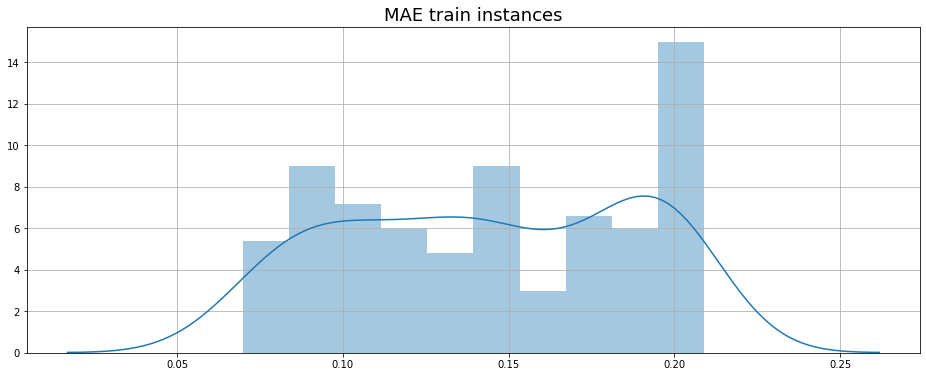

In [4]:
plt.figure(figsize=(16,6))
sns.distplot(mae_train, bins=10)
plt.grid()
plt.title('MAE train instances', fontsize=18)

In [5]:
threshold = 0.2

In [6]:
test = data[127:-7]
test['loss'] = mae_test
test['anomaly'] = test['loss'] > threshold

<ipython-input-6-12b4f0ec0b39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['loss'] = mae_test
<ipython-input-6-12b4f0ec0b39>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['anomaly'] = test['loss'] > threshold


<ipython-input-7-4d9023e42400>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().xaxis.set_major_locator(loc)


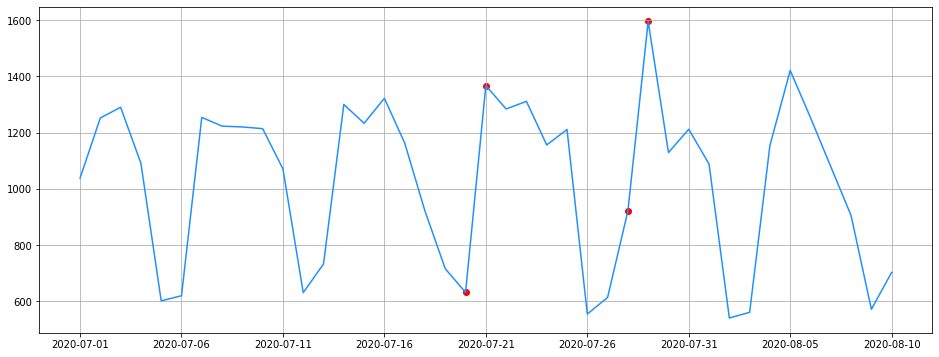

In [7]:
plt.figure(figsize=(16, 6))
plt.plot(test['date'], test['deaths'], color='dodgerblue')
scatter_df = test[test['anomaly'] == True]
plt.scatter(scatter_df['date'], scatter_df['deaths'], color='red')
plt.grid()
# plt.xticks([])

loc = ticker.MultipleLocator(base=5) # this locator puts ticks at regular intervals
plt.axes().xaxis.set_major_locator(loc)